In [1]:
from visual_behavior import utilities as vbu
import visual_behavior.plotting as vbp
from visual_behavior.utilities import EyeTrackingData
from visual_behavior import database as db
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import time
import seaborn as sns
import matplotlib.patches as patches

import glob

from scipy import stats

from multiprocessing import Pool

from dro.modules import eye_tracking as et
from dro.modules import plotting as plot_utils

import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib notebook
%widescreen

In [5]:
p=r"\\allen\programs\braintv\workgroups\nc-ophys\Doug\851438454_video-1DLC_resnet50_universal_eye_trackingJul10shuffle1_1030000_ellipse.h5".replace('\\','/')
p

'//allen/programs/braintv/workgroups/nc-ophys/Doug/851438454_video-1DLC_resnet50_universal_eye_trackingJul10shuffle1_1030000_ellipse.h5'

In [7]:
osid = 851438454
ed = EyeTrackingData(osid, ellipse_fit_path='//allen/programs/braintv/workgroups/nc-ophys/Doug/851438454_video-1DLC_resnet50_universal_eye_trackingJul10shuffle1_1030000_ellipse.h5', data_source='filesystem')

In [9]:
def get_raw_points(path):
    print(path)
    raw_points = pd.read_hdf(path)
    return raw_points

In [10]:
def make_plot(ed, initial_frame):
    osid = ed.ophys_session_id
    raw_points = get_raw_points(path='//allen/programs/braintv/workgroups/nc-ophys/Doug/851438454_video-1DLC_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5')
    fig,ax=plt.subplots(1,5,figsize=(15,3))

    
    for ii,frame in enumerate(range(initial_frame-2,initial_frame+3)):
        ax[ii].imshow(ed.get_annotated_frame(frame))

        pupil_columns = sorted([c for c in np.unique(np.array(raw_points.columns.get_level_values(1))) if c.startswith('pupil')])
        palette = sns.color_palette("hls", len(pupil_columns))
        for c,pupil_column in enumerate(pupil_columns):
            dft = raw_points[raw_points.columns.get_level_values(0)[0]][pupil_column]
            ax[ii].plot(dft.loc[frame]['x'],dft.loc[frame]['y'],marker='o',color='blue',alpha=0.75,markersize=8)

        eye_columns = sorted([c for c in np.unique(np.array(raw_points.columns.get_level_values(1))) if c.startswith('eye')])
        palette = sns.color_palette("hls", len(eye_columns))
        for c,eye_column in enumerate(eye_columns):
            dft = raw_points[raw_points.columns.get_level_values(0)[0]][eye_column]
            ax[ii].plot(dft.loc[frame]['x'],dft.loc[frame]['y'],marker='o',color='red',alpha=0.75,markersize=8)

        ax[ii].set_title('frame = {}'.format(frame))
        ax[ii].axis('off')
    fig.tight_layout()
    plt.subplots_adjust(top=0.9,hspace=0,wspace=0)
    fig.suptitle('ophys_session_id = {}'.format(osid))
    return fig,ax

//allen/programs/braintv/workgroups/nc-ophys/Doug/851438454_video-1DLC_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>


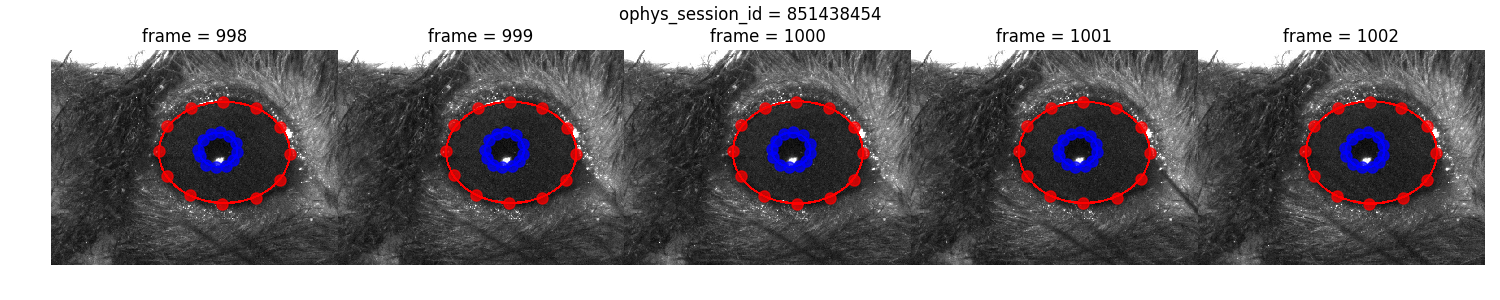

(<Figure size 1500x300 with 5 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f35704fb208>,
       dtype=object))

In [11]:
make_plot(ed,1000)

In [17]:
def make_and_save_figure(ellipse_filename):
    osid = os.path.split(ellipse_filename)[1][:9]
#     raw_points = get_raw_points(osid)
    ed = EyeTrackingData(osid, ellipse_fit_path = ellipse_filename, data_source='filesystem')
    fig,ax = make_plot(ed, initial_frame = 1000);
    fig.savefig('/allen/aibs/technology/waynew/eye/phase3/29intermediate/plots/{}.png'.format(osid),dpi=300)

In [19]:
ellipse_filenames = glob.glob('/allen/aibs/technology/waynew/eye/phase3/29intermediate/*_ellipse.h5')

with Pool(16) as pool:
    pool.map(make_and_save_figure, np.array(ellipse_filenames))
    

/allen/aibs/technology/waynew/eye/phase3/29intermediate/820871900_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/833705055_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/808107961_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/893937838_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/796018019_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/798818118_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/808092249_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>

/allen/aibs/technology/waynew/eye/phase3/29intermediate/841303580_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/795625712_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/848253761_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/898870044_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>

/allen/aibs/technology/waynew/eye/phase3/29intermediate/853416014_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/829521794_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/809393834_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/795866393_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/789220000_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/allen/aibs/technology/waynew/eye/phase3/29intermediate/851438454_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/807055274_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/allen/aibs/technology/waynew/eye/phase3/29intermediate/793857113_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5
/allen/aibs/technology/waynew/eye/phase3/29intermediate/803223329_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/allen/aibs/technology/waynew/eye/phase3/29intermediate/789220000_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5


<IPython.core.display.Javascript object>


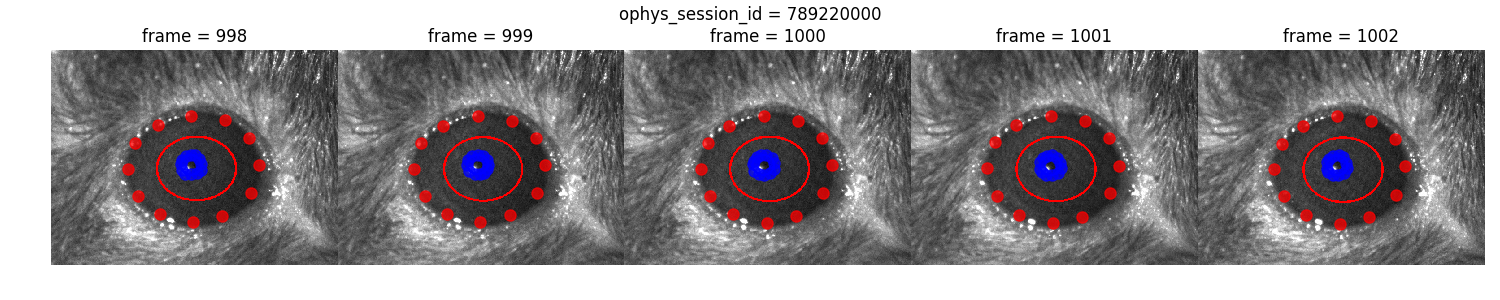

In [18]:
make_and_save_figure(ellipse_filenames[0])

In [69]:
def get_pupil_and_eye_ratios(raw_point_path, ellipse_fit_path):
    def get_range(columns,frame=1000):
        min_x=np.inf
        max_x=-np.inf

        for column in columns:
            x = raw_points[raw_points.columns.get_level_values(0)[0]][column].loc[frame]['x']
            if x<min_x:
                min_x = x
            if x>max_x:
                max_x = x

        return min_x,max_x

    raw_points = pd.read_hdf(raw_points_path)

    ellipse_fits = {}
    for dataset in ['pupil', 'eye', 'cr']:
        ellipse_fits[dataset] = pd.read_hdf(ellipse_fit_path, dataset)

    

    min_x,max_x = get_range(pupil_columns)
    pupil_fit_to_point_ratio = ellipse_fits['pupil'].loc[1000]['width']*2/(max_x - min_x)

    min_x,max_x = get_range(eye_columns)
    eye_fit_to_point_ratio = ellipse_fits['eye'].loc[1000]['width']*2/(max_x - min_x)
    print(min_x,max_x,ellipse_fits['eye'].loc[1000]['width']*2)
    return pupil_fit_to_point_ratio, eye_fit_to_point_ratio

In [70]:
folder = '/allen/aibs/technology/waynew/eye/phase3/29intermediate'

# osid = 846599329
# raw_points_path = glob.glob(os.path.join(folder,'{}*1030000.h5'.format(osid)))[0]
# ellipse_fit_path = glob.glob(os.path.join(folder,'{}*1030000_ellipse.h5'.format(osid)))[0]

raw_points_path = '/allen/aibs/technology/waynew/eye/phase3/29intermediate/851438454_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000.h5'
ellipse_fit_path = '/allen/programs/braintv/workgroups/cortexmodels/peterl/ForWayne/851438454_video-1DeepCut_resnet50_universal_eye_trackingJul10shuffle1_1030000_ellipse.h5'
pr,er = get_pupil_and_eye_ratios(raw_points_path, ellipse_fit_path)
print(pr,er)

242.43741965293884 533.3039528131485 291.4308338566724
1.0140976570767644 1.0019400674609475


In [71]:
(533.3039528131485-242.43741965293884)/291.4308338566724

0.998063689112799

In [50]:
def get_range(columns,frame=1000):
    min_x=np.inf
    max_x=-np.inf

    for column in columns:
        x = raw_points[raw_points.columns.get_level_values(0)[0]][column].loc[frame]['x']
        if x<min_x:
            min_x = x
        if x>max_x:
            max_x = x
        
    return min_x,max_x

min_x,max_x = get_range(pupil_columns)

In [52]:
pupil_fit_to_point_ratio = ellipse_fits['pupil'].loc[1000]['width']*2/(max_x - min_x)
pupil_fit_to_point_ratio

1.0140976572371556

In [56]:
min_x,max_x = get_range(eye_columns)
eye_fit_to_point_ratio = ellipse_fits['eye'].loc[1000]['width']*2/(max_x - min_x)
eye_fit_to_point_ratio

0.6360669100655476